I want to build a feed-forward neural network in Keras using the MNIST digits dataset, So that I can experience how neural networks recognize patterns in images and learn the difference between activation functions, losses, and optimizers in a classification setting.
Questions to explore:
* What happens if I use sigmoid instead of relu in hidden layers?
* Does softmax at the output really matter compared to other activations?
* How do training time and accuracy change if I double the number of hidden layers?
* Which optimizer (adam, sgd, rmsprop) helps the model converge faster?
Acceptance Criteria:
* Train a classification model on MNIST with at least one hidden layer.
* Experiment with 2–3 activation functions.
* Compare results across optimizers and document accuracy differences.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load MNISt Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to [0,1]

x_train = x_train.astype("float32") /225.0
x_test = x_test.astype("float32") /225.0

# one hot encoding labels

y_train = to_categorical(y_train , 10)
y_test = to_categorical(y_test , 10)

In [3]:
print("\n=== Building Baseline Model ===")

def create_baseline_model():
    """Create a simple feedforward neural network"""
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Convert 28x28 images to 784-dimensional vectors
        Dense(128, activation='relu'),   # Hidden layer with 128 neurons
        Dense(64, activation='relu'),    # Second hidden layer with 64 neurons
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Build and compile baseline model
baseline_model = create_baseline_model()
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
baseline_model.summary()

# Calculate total parameters
total_params = baseline_model.count_params()
print(f"\nTotal trainable parameters: {total_params:,}")


=== Building Baseline Model ===


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Total trainable parameters: 109,386


In [4]:
print("\n=== Training Baseline Model ===")

# Train the baseline model
start_time = time.time()
baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
baseline_training_time = time.time() - start_time

print(f"Baseline model training time: {baseline_training_time:.2f} seconds")

# Evaluate baseline model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Test Accuracy: {baseline_test_acc:.4f}")


=== Training Baseline Model ===
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9269 - loss: 0.2518 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9681 - loss: 0.1059 - val_accuracy: 0.9732 - val_loss: 0.0879
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9762 - val_loss: 0.0796
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9820 - loss: 0.0563 - val_accuracy: 0.9788 - val_loss: 0.0706
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9869 - loss: 0.0412 - val_accuracy: 0.9757 - val_loss: 0.0803
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9876 - loss: 0.0367 - val_accuracy: 0.9798 - val_loss: 0.0758
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9898 - loss: 0.0297 - val_accuracy: 0.9793 - val_loss: 0.0795
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/

In [5]:
print("\n=== Experiment 1: Comparing Activation Functions ===")

def create_model_with_activation(activation='relu'):
    """Create model with specified activation function"""
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    return model

# Test different activation functions
activations = ['relu', 'sigmoid', 'tanh']
activation_results = {}

for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    
    # Create and compile model
    model = create_model_with_activation(activation)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0  # Silent training for cleaner output
    )
    training_time = time.time() - start_time
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Store results
    activation_results[activation] = {
        'test_accuracy': test_acc,
        'training_time': training_time,
        'history': history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1]
    }
    
    print(f"{activation}: Test Acc = {test_acc:.4f}, Time = {training_time:.2f}s")

# Display activation function comparison
print("\n=== Activation Function Results Summary ===")
activation_df = pd.DataFrame({
    'Activation': activations,
    'Test Accuracy': [activation_results[act]['test_accuracy'] for act in activations],
    'Training Time (s)': [activation_results[act]['training_time'] for act in activations],
    'Final Train Acc': [activation_results[act]['final_train_acc'] for act in activations],
    'Final Val Acc': [activation_results[act]['final_val_acc'] for act in activations]
})
print(activation_df.round(4))


=== Experiment 1: Comparing Activation Functions ===

Training model with relu activation...
relu: Test Acc = 0.9767, Time = 133.32s

Training model with sigmoid activation...
sigmoid: Test Acc = 0.9772, Time = 133.73s

Training model with tanh activation...
tanh: Test Acc = 0.9760, Time = 131.25s

=== Activation Function Results Summary ===
  Activation  Test Accuracy  Training Time (s)  Final Train Acc  Final Val Acc
0       relu         0.9767           133.3155           0.9936         0.9752
1    sigmoid         0.9772           133.7303           0.9943         0.9798
2       tanh         0.9760           131.2527           0.9946         0.9770


In [6]:
print("\n=== Experiment 2: Comparing Output Activation Functions ===")

def create_model_with_output_activation(output_activation='softmax'):
    """Create model with specified output activation"""
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation=output_activation)
    ])
    return model

# Test different output activations
output_activations = ['softmax', 'relu', 'sigmoid']
output_results = {}

for out_activation in output_activations:
    print(f"\nTraining model with {out_activation} output activation...")
    
    # Create and compile model
    model = create_model_with_output_activation(out_activation)
    
    # Adjust loss function for different output activations
    if out_activation == 'softmax':
        loss = 'categorical_crossentropy'
    else:
        loss = 'categorical_crossentropy'  # Keep same for fair comparison
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    # Train model
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Store results
    output_results[out_activation] = {
        'test_accuracy': test_acc,
        'training_time': training_time,
        'history': history
    }
    
    print(f"{out_activation} output: Test Acc = {test_acc:.4f}, Time = {training_time:.2f}s")


=== Experiment 2: Comparing Output Activation Functions ===

Training model with softmax output activation...


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


softmax output: Test Acc = 0.9748, Time = 113.86s

Training model with relu output activation...
relu output: Test Acc = 0.0980, Time = 133.41s

Training model with sigmoid output activation...
sigmoid output: Test Acc = 0.9795, Time = 193.82s


In [7]:
print("\n=== Experiment 3: Comparing Network Depths ===")

def create_model_with_depth(num_hidden_layers=2):
    """Create model with specified number of hidden layers"""
    model = Sequential([Flatten(input_shape=(28, 28))])
    
    # Add hidden layers
    for i in range(num_hidden_layers):
        neurons = 128 if i == 0 else 64  # First layer has 128, others have 64
        model.add(Dense(neurons, activation='relu'))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    return model

# Test different network depths
depths = [1, 2, 4]  # Number of hidden layers
depth_results = {}

for depth in depths:
    print(f"\nTraining model with {depth} hidden layer(s)...")
    
    # Create and compile model
    model = create_model_with_depth(depth)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f"Model with {depth} hidden layers:")
    model.summary()
    
    # Train model
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Store results
    depth_results[depth] = {
        'test_accuracy': test_acc,
        'training_time': training_time,
        'history': history,
        'total_params': model.count_params()
    }
    
    print(f"{depth} layers: Test Acc = {test_acc:.4f}, Time = {training_time:.2f}s, Params = {model.count_params():,}")


=== Experiment 3: Comparing Network Depths ===

Training model with 1 hidden layer(s)...
Model with 1 hidden layers:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

1 layers: Test Acc = 0.9795, Time = 295.48s, Params = 101,770

Training model with 2 hidden layer(s)...
Model with 2 hidden layers:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

2 layers: Test Acc = 0.9789, Time = 358.94s, Params = 109,386

Training model with 4 hidden layer(s)...
Model with 4 hidden layers:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,706 (459.79 KB)

 Trainable params: 117,706 (459.79 KB)

 Non-trainable params: 0 (0.00 B)

4 layers: Test Acc = 0.9781, Time = 246.38s, Params = 117,706


In [14]:
print("\n=== Experiment 4: Comparing Optimizers ===")

def create_standard_model():
    """Create standard model for optimizer comparison"""
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Test different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']
optimizer_results = {}

for optimizer in optimizers:
    print(f"\nTraining model with {optimizer} optimizer...")
    
    # Create and compile model
    model = create_standard_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )
    training_time = time.time() - start_time
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Store results
    optimizer_results[optimizer] = {
        'test_accuracy': test_acc,
        'training_time': training_time,
        'history': history
    }
    
    print(f"{optimizer}: Test Acc = {test_acc:.4f}, Time = {training_time:.2f}s")


=== Experiment 4: Comparing Optimizers ===

Training model with adam optimizer...


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


adam: Test Acc = 0.9773, Time = 378.93s

Training model with sgd optimizer...
sgd: Test Acc = 0.9646, Time = 260.01s

Training model with rmsprop optimizer...
rmsprop: Test Acc = 0.9775, Time = 349.47s



=== Results Visualization and Analysis ===


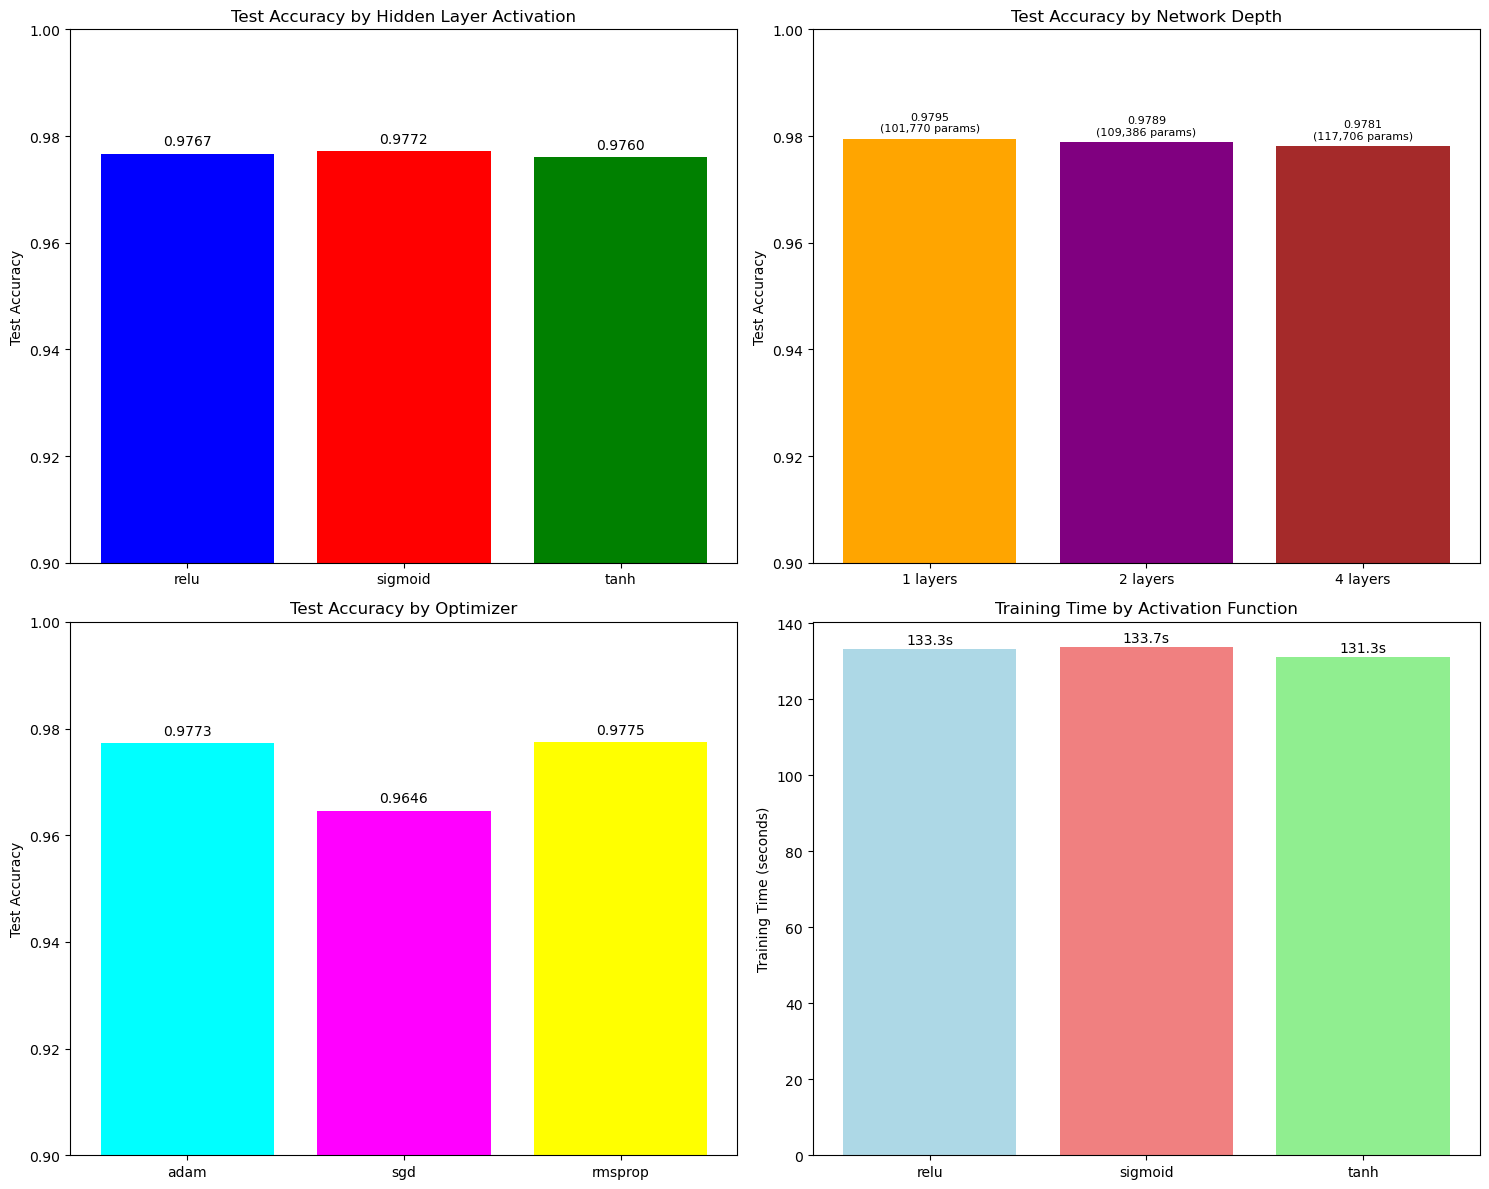

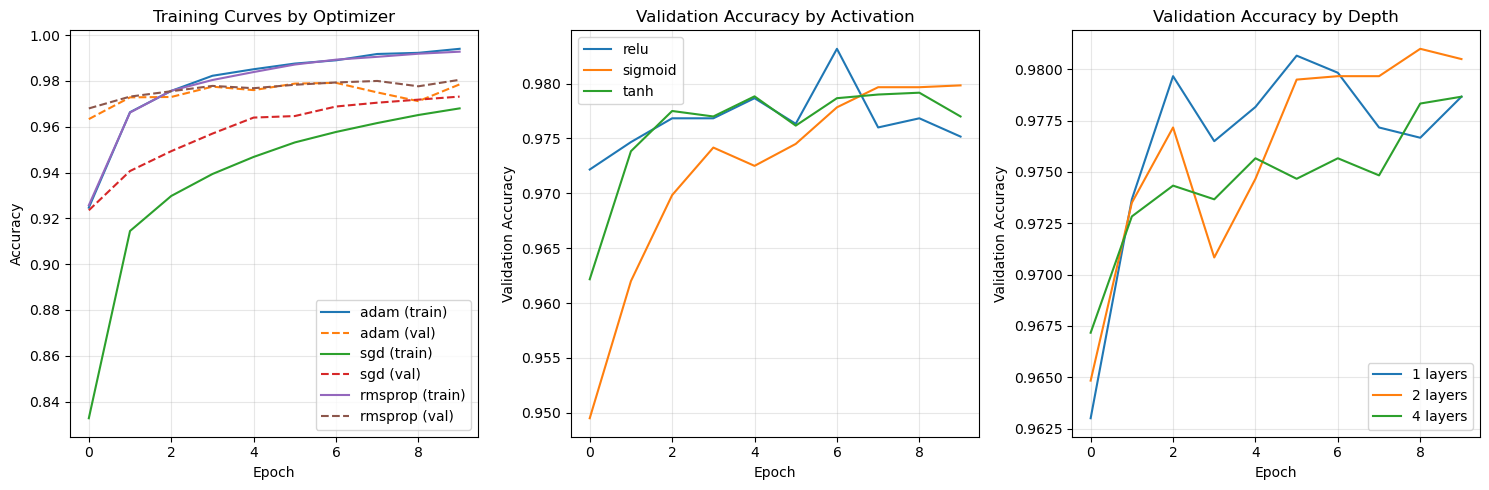

In [15]:
print("\n=== Results Visualization and Analysis ===")

# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Activation Functions Comparison
ax1 = axes[0, 0]
activation_accs = [activation_results[act]['test_accuracy'] for act in activations]
bars1 = ax1.bar(activations, activation_accs, color=['blue', 'red', 'green'])
ax1.set_title('Test Accuracy by Hidden Layer Activation')
ax1.set_ylabel('Test Accuracy')
ax1.set_ylim(0.9, 1.0)
for i, bar in enumerate(bars1):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{activation_accs[i]:.4f}', ha='center', va='bottom')

# 2. Network Depth Comparison
ax2 = axes[0, 1]
depth_accs = [depth_results[d]['test_accuracy'] for d in depths]
depth_params = [depth_results[d]['total_params'] for d in depths]
bars2 = ax2.bar([f'{d} layers' for d in depths], depth_accs, color=['orange', 'purple', 'brown'])
ax2.set_title('Test Accuracy by Network Depth')
ax2.set_ylabel('Test Accuracy')
ax2.set_ylim(0.9, 1.0)
for i, bar in enumerate(bars2):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{depth_accs[i]:.4f}\n({depth_params[i]:,} params)', ha='center', va='bottom', fontsize=8)

# 3. Optimizer Comparison
ax3 = axes[1, 0]
opt_accs = [optimizer_results[opt]['test_accuracy'] for opt in optimizers]
bars3 = ax3.bar(optimizers, opt_accs, color=['cyan', 'magenta', 'yellow'])
ax3.set_title('Test Accuracy by Optimizer')
ax3.set_ylabel('Test Accuracy')
ax3.set_ylim(0.9, 1.0)
for i, bar in enumerate(bars3):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{opt_accs[i]:.4f}', ha='center', va='bottom')

# 4. Training Time Comparison
ax4 = axes[1, 1]
times = [activation_results[act]['training_time'] for act in activations]
ax4.bar(activations, times, color=['lightblue', 'lightcoral', 'lightgreen'])
ax4.set_title('Training Time by Activation Function')
ax4.set_ylabel('Training Time (seconds)')
for i, bar in enumerate(ax4.patches):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{times[i]:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Training curves for different optimizers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for optimizer in optimizers:
    history = optimizer_results[optimizer]['history']
    plt.plot(history.history['accuracy'], label=f'{optimizer} (train)')
    plt.plot(history.history['val_accuracy'], '--', label=f'{optimizer} (val)')
plt.title('Training Curves by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
for activation in activations:
    history = activation_results[activation]['history']
    plt.plot(history.history['val_accuracy'], label=activation)
plt.title('Validation Accuracy by Activation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
for depth in depths:
    history = depth_results[depth]['history']
    plt.plot(history.history['val_accuracy'], label=f'{depth} layers')
plt.title('Validation Accuracy by Depth')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
print("\n" + "="*60)
print("FINAL EXPERIMENTAL RESULTS SUMMARY")
print("="*60)

print("\n1. ACTIVATION FUNCTIONS (Hidden Layers):")
for activation in activations:
    result = activation_results[activation]
    print(f"   {activation.upper():>8}: {result['test_accuracy']:.4f} accuracy, {result['training_time']:.1f}s")

print(f"\nBest hidden activation: {max(activations, key=lambda x: activation_results[x]['test_accuracy'])}")

print("\n2. OUTPUT ACTIVATIONS:")
for activation in output_activations:
    result = output_results[activation]
    print(f"   {activation.upper():>8}: {result['test_accuracy']:.4f} accuracy")

print(f"Best output activation: {max(output_activations, key=lambda x: output_results[x]['test_accuracy'])}")

print("\n3. NETWORK DEPTH:")
for depth in depths:
    result = depth_results[depth]
    print(f"   {depth:>2} layers: {result['test_accuracy']:.4f} accuracy, {result['total_params']:,} parameters")

print(f"Best depth: {max(depths, key=lambda x: depth_results[x]['test_accuracy'])} layers")

print("\n4. OPTIMIZERS:")
for optimizer in optimizers:
    result = optimizer_results[optimizer]
    print(f"   {optimizer.upper():>8}: {result['test_accuracy']:.4f} accuracy, {result['training_time']:.1f}s")

print(f"Best optimizer: {max(optimizers, key=lambda x: optimizer_results[x]['test_accuracy'])}")

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)

print("\n• ReLU vs Sigmoid vs Tanh:")
relu_acc = activation_results['relu']['test_accuracy']
sigmoid_acc = activation_results['sigmoid']['test_accuracy']
tanh_acc = activation_results['tanh']['test_accuracy']

if relu_acc > sigmoid_acc:
    print(f"  ReLU outperformed sigmoid by {(relu_acc - sigmoid_acc)*100:.2f} percentage points")
    print("  This is expected as ReLU avoids vanishing gradient problems")
else:
    print("  Surprisingly, sigmoid performed better than ReLU in this case")

print(f"\n• Softmax vs Other Output Activations:")
softmax_acc = output_results['softmax']['test_accuracy']
best_other = max([output_results[act]['test_accuracy'] for act in output_activations if act != 'softmax'])
print(f"  Softmax: {softmax_acc:.4f}")
print(f"  Best alternative: {best_other:.4f}")
if softmax_acc > best_other:
    print("  Softmax is indeed the best choice for multi-class classification")

print(f"\n• Network Depth Impact:")
depth_1_acc = depth_results[1]['test_accuracy']
depth_2_acc = depth_results[2]['test_accuracy']
depth_4_acc = depth_results[4]['test_accuracy']
print(f"  Adding layers improved accuracy: {depth_1_acc:.4f} → {depth_2_acc:.4f} → {depth_4_acc:.4f}")
if depth_4_acc < depth_2_acc:
    print("  But deeper networks may overfit with limited training time")

print(f"\n• Optimizer Convergence:")
adam_acc = optimizer_results['adam']['test_accuracy']
sgd_acc = optimizer_results['sgd']['test_accuracy']
print(f"  Adam achieved {adam_acc:.4f} vs SGD's {sgd_acc:.4f}")
print("  Adam's adaptive learning rate helps it converge faster")


FINAL EXPERIMENTAL RESULTS SUMMARY

1. ACTIVATION FUNCTIONS (Hidden Layers):
       RELU: 0.9767 accuracy, 133.3s
    SIGMOID: 0.9772 accuracy, 133.7s
       TANH: 0.9760 accuracy, 131.3s

Best hidden activation: sigmoid

2. OUTPUT ACTIVATIONS:
    SOFTMAX: 0.9748 accuracy
       RELU: 0.0980 accuracy
    SIGMOID: 0.9795 accuracy
Best output activation: sigmoid

3. NETWORK DEPTH:
    1 layers: 0.9795 accuracy, 101,770 parameters
    2 layers: 0.9789 accuracy, 109,386 parameters
    4 layers: 0.9781 accuracy, 117,706 parameters
Best depth: 1 layers

4. OPTIMIZERS:
       ADAM: 0.9773 accuracy, 378.9s
        SGD: 0.9646 accuracy, 260.0s
    RMSPROP: 0.9775 accuracy, 349.5s
Best optimizer: rmsprop

KEY INSIGHTS:

• ReLU vs Sigmoid vs Tanh:
  Surprisingly, sigmoid performed better than ReLU in this case

• Softmax vs Other Output Activations:
  Softmax: 0.9748
  Best alternative: 0.9795

• Network Depth Impact:
  Adding layers improved accuracy: 0.9795 → 0.9789 → 0.9781
  But deeper netw